
# Investigate reasons of patient not showing to appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The dataset chosen is about the patients and them attending their appointments or not. Patients have different features that case their absent to the appointment or attending such as Diabetes, alcoholism, etc. 
>Scholarship is main resource for families to help them with health insurance, which raise important question what is the relationship between scholarship and showing up to appointments? 
>Second question is patients with high number of appointments attend regularly?

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> This section the data will be loaded, cleaned, and tripmed as needed.

### General Properties

> First lets upload the data into the notebook using pandas "read_csv()". Then we can visualize the first 5 rows to have an idea of how the data are placed in the dataset.

In [6]:
df = pd.read_csv('noshowappoint.csv')
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


>Lets check the shape of the duplicated values in general. Also, if the patient has multiple appointments. 

In [7]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [8]:
df.shape

(110527, 14)

In [9]:
total=df.shape[0]
total

110527

In [10]:
sum(df.duplicated())

0

In [11]:
sum(df.duplicated(['PatientId']))

48228

>There are 48228 patient, which raise a question do the patient go to all the appointment or not.
>Lets check the if there is doublicated values in the PatientId and the AppointmentId

In [12]:
sum(df.duplicated(['PatientId','AppointmentID']))

0

### Data Cleaning (Replace this with more specific notes!)

>As shown the data contains patient id, appointment id, gender, etc.
>The last column "No_Show" determine if the patient arrived or not, by Yes or No Values. Strings values are hard to calculate for that the Yes values will be replaced by 1's and No values with 0's.

In [13]:
df['No-show'].replace('No', 1,inplace=True)
df['No-show'].replace('Yes', 0,inplace=True)

> The name of some of the columns are not spelled correctly lets change those.

In [14]:
df.rename(columns = {"Hipertension":"Hypertension","Handcap":"Handicap","No-show":"Show"}, inplace = True)

> Now to check if the modification is applied.

In [15]:
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1


>Now lets check the statistic values of the data. 

In [16]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


>As we can see most of the people included in the dataset are between the age of 37 and 55. Also, the majority didn’t receive an SMS. Percent of the patients who showed to the appointment is high.

>Now lets see if there is null values in the dataset and the type of the data

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Show              110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


> There is no null values in the dataset. Now lets change the data type of ScheduledDay and AppointmentDay to datetime.

In [18]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

> Now we check if the changes are applied

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
Show              110527 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(2)
memory usage: 11.8+ MB


>Now lets change the data type for PatientId and AppointmentID to object

In [20]:
df['PatientId']=df['PatientId'].astype(str)
df['AppointmentID']=df['AppointmentID'].astype(str)

>Lets check if the change is done correctly

In [21]:
df.dtypes

PatientId                 object
AppointmentID             object
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
Show                       int64
dtype: object

Now to visuals the data into histogram.

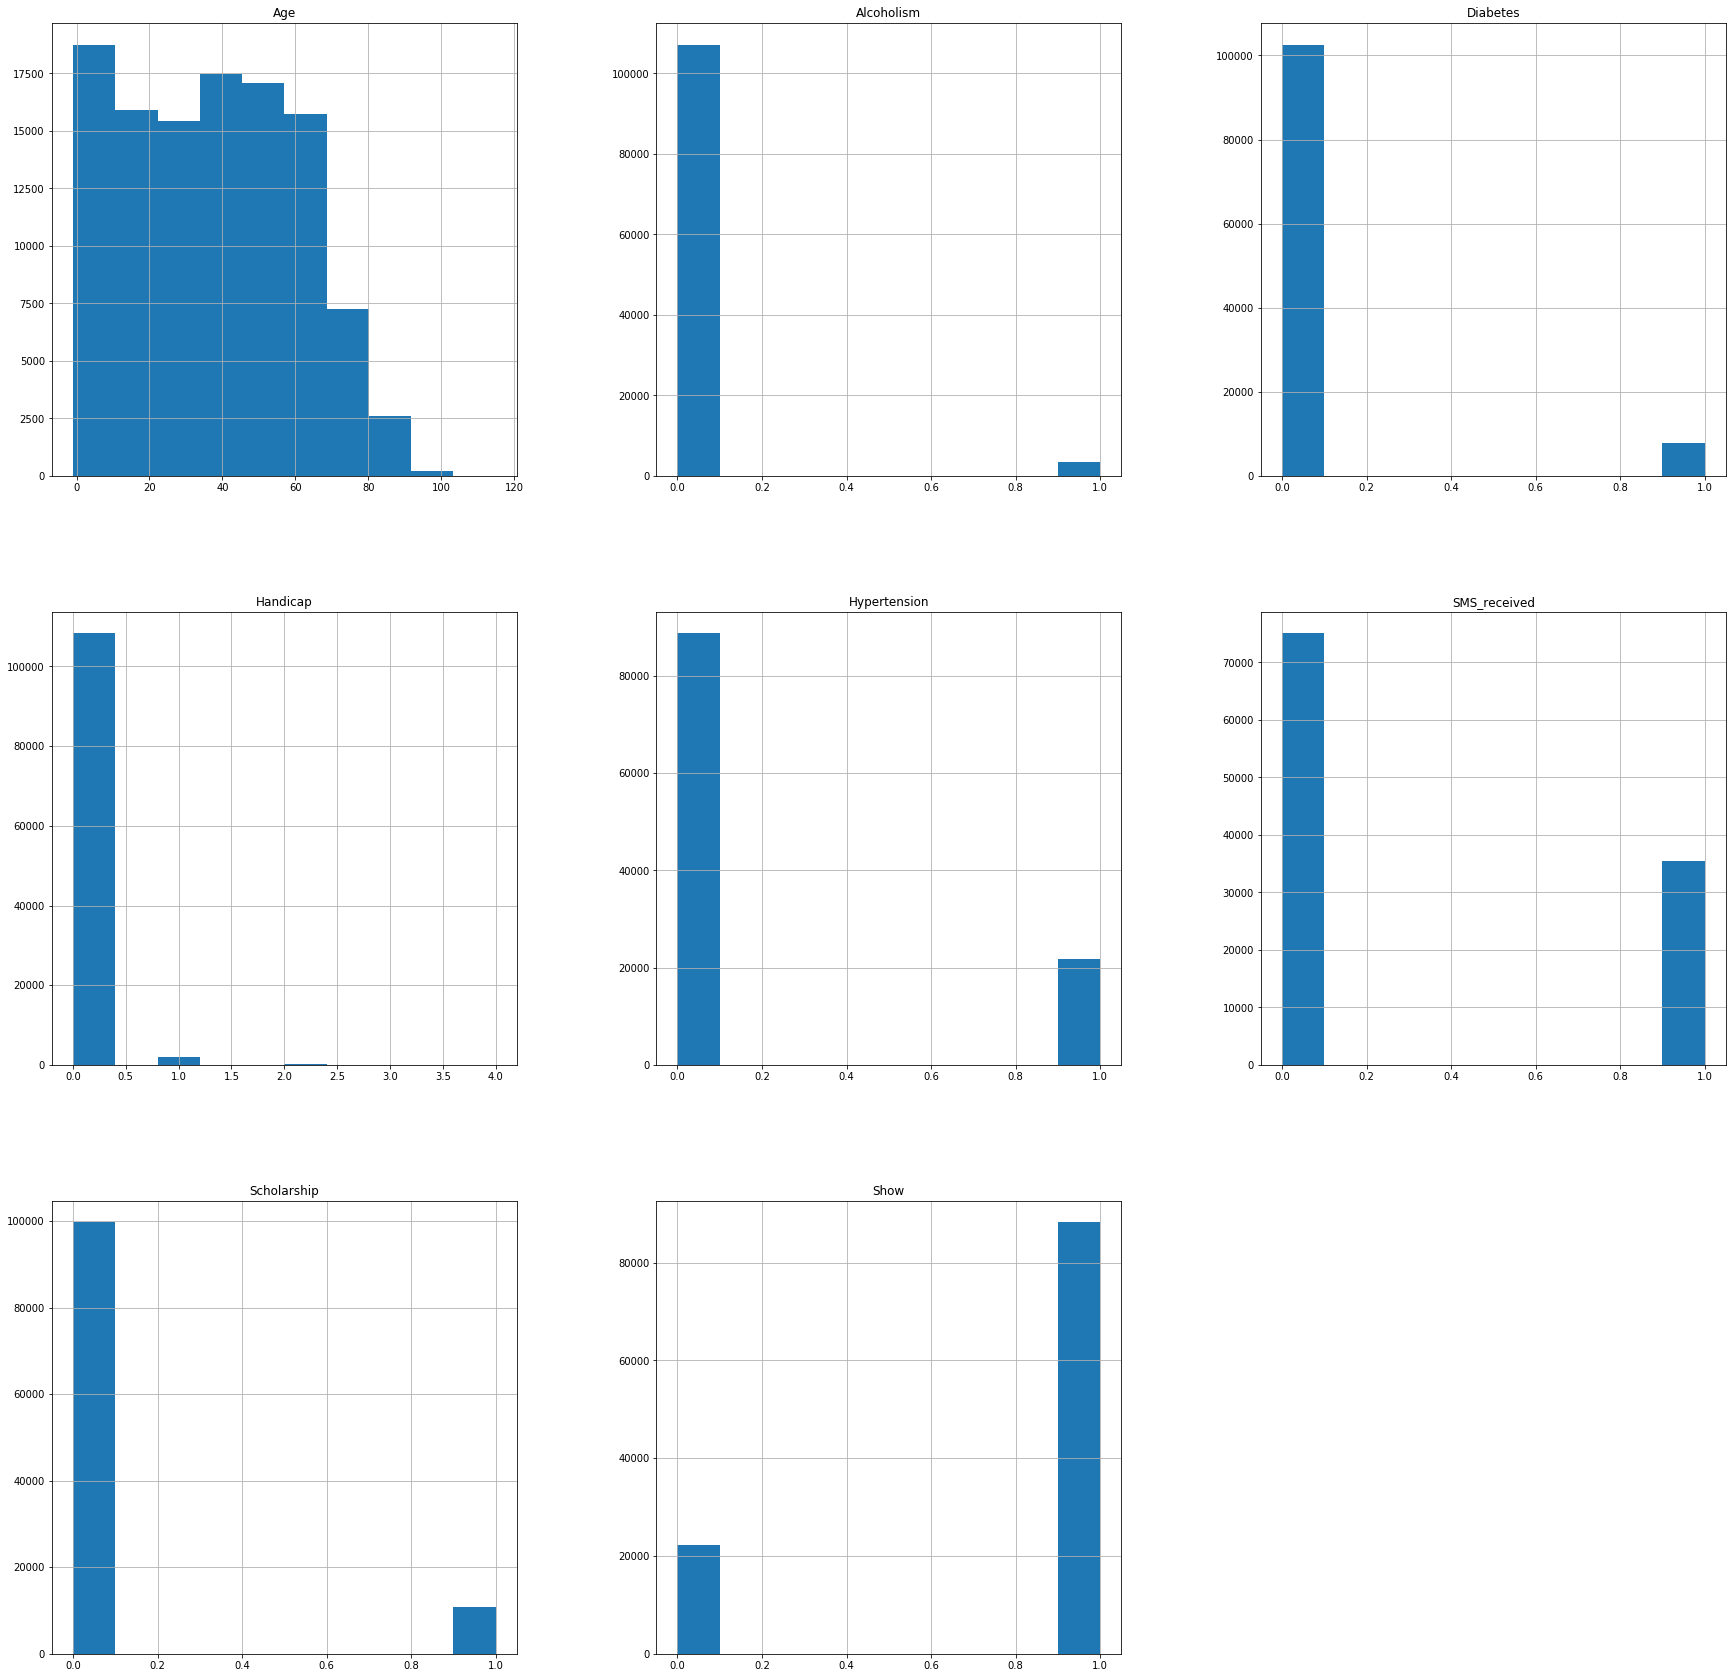

In [22]:
df.hist(figsize=(30,30));

>The column Age is A right-skewed which says that the majority of the patient are young.

<a id='eda'></a>
## Exploratory Data Analysis
.
### Research Question 1: What is the relation between Scholarship and (Hypertension, Diabetes, Alcoholism, Handicap)? Does the relation effect the patient appointment visit?

>Now lets create masks for those values in the data set

In [23]:
scholarship = df.Scholarship == True
nonscholarship = df.Scholarship == False
coholic = df.Alcoholism == True
noncoholic= df.Alcoholism == False
hypertension = df.Hypertension == True
nonhypertension = df.Hypertension == False
diabetes = df.Diabetes == True
nondiabetes = df.Diabetes == False
handicap = df.Handicap == True
nonhandicap = df.Handicap == False
noshow = df.Show == False
show = df.Show == True

>First lets check the alcoholism

In [24]:
df.Scholarship[coholic].mean()

0.15714285714285714

In [25]:
df.Scholarship[noncoholic].mean()

0.09641960678193846

>*Note that* Alcoholism is high when there is a Scholarship

>Now we can divied the Alcoholic and Noncoholic with and without scolarship, then compare it to who attend the appointment

>Here we will extract people who have scholarship or not, while having alcoholism

In [26]:
df_sch_coh = df[(df['Alcoholism'] == 1) & (df['Scholarship'] == 1)]
df_nosch_coh = df[(df['Alcoholism'] == 1) & (df['Scholarship'] == 0)]
df_sch_coh.shape,df_nosch_coh.shape

((528, 14), (2832, 14))

>Here we will extract people who have scholarship or not, without having alcoholism

In [39]:
df_sch_nocoh = df[(df['Alcoholism'] == 0) & (df['Scholarship'] == 1)]
df_nosch_nocoh = df[(df['Alcoholism'] == 0) & (df['Scholarship'] == 0)]
df_sch_nocoh.shape,df_nosch_nocoh.shape

((10333, 14), (96834, 14))

>Lets extract the patients who showed if they have scholarship or not, and they have alcoholism

In [40]:
df_sch_coh_show = df_sch_coh[df_sch_coh['Show'] == 1]
df_nosch_coh_show = df_nosch_coh[df_nosch_coh['Show'] == 1]
df_sch_coh_show.shape,df_nosch_coh_show.shape

((379, 14), (2304, 14))

>Lets extract the patients who showed if they have scholarship or not, and they don't have alcoholism

In [41]:
df_sch_nocoh_show = df_sch_nocoh[df_sch_nocoh['Show'] == 1]
df_nosch_nocoh_show = df_nosch_nocoh[df_nosch_nocoh['Show'] == 1]
df_sch_nocoh_show.shape,df_nosch_nocoh_show.shape

((7904, 14), (77621, 14))

>Lets see the precentage and what is the best catagory that showed up to the appointment

In [42]:
sch_coh_show = (379/total)*100
nosch_coh_show =(2304/total)*100
sch_nocoh_show =(7904/total)*100
nosch_nocoh_show=(77621/total)*100
rest=sch_coh_show+nosch_coh_show+sch_nocoh_show+nosch_nocoh_show
rest=100-rest
rest

20.193255946510817

>now lets visualize the data

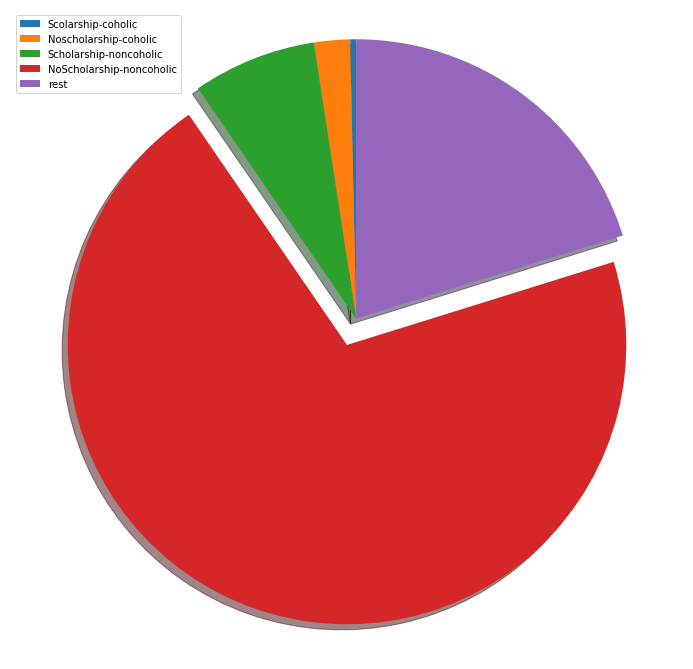

In [43]:
labels = 'Scolarship-coholic', 'Noscholarship-coholic', 'Scholarship-noncoholic', 'NoScholarship-noncoholic','rest'
sizes = [sch_coh_show, nosch_coh_show, sch_nocoh_show, nosch_nocoh_show,rest]
explode = (0, 0, 0, 0.1,0) 
fig1, ax1 = plt.subplots()
patches, texts=plt.pie(sizes, explode=explode,shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
texts[0].set_fontsize(4)
plt.axis('equal')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

>We can that people without scholarship and noncoholic show up by 70% than the rest of the other categories

>Second hypertension

In [44]:
df.Scholarship[hypertension].mean()

0.08641805421769644

In [45]:
df.Scholarship[nonhypertension].mean()

0.10117665622252778

>*Note that* people without hypertension are high with scholarship

Now we can divied the hypertension and without hypertension with and without scolarship, then compare it to who attend the appointment

>Here we will extract people who have scholarship or not, with hypertension

In [36]:
df_sch_hyp = df[(df['Hypertension'] == 1) & (df['Scholarship'] == 1)]
df_nosch_hyp = df[(df['Hypertension'] == 1) & (df['Scholarship'] == 0)]
df_sch_hyp.shape,df_nosch_hyp.shape

((1884, 14), (19917, 14))

>Here we will extract people who have scholarship or not, without having hypertension

In [37]:
df_sch_nohyp = df[(df['Hypertension'] == 0) & (df['Scholarship'] == 1)]
df_nosch_nohyp = df[(df['Hypertension'] == 0) & (df['Scholarship'] == 0)]
df_sch_nohyp.shape,df_nosch_nohyp.shape

((8977, 14), (79749, 14))

>Lets extract the patients who showed if they have scholarship or not, and they have hypertension

In [46]:
df_sch_hyp_show = df_sch_hyp[df_sch_hyp['Show'] == 1]
df_nosch_hyp_show = df_nosch_hyp[df_nosch_hyp['Show'] == 1]
df_sch_hyp_show.shape,df_nosch_hyp_show.shape

((1512, 14), (16517, 14))

>Lets extract the patients who showed if they have scholarship or not, and they don't have hypertension

In [238]:
df_sch_nohyp_show = df_sch_nohyp[df_sch_nohyp['Show'] == 1]
df_nosch_nohyp_show = df_nosch_nohyp[df_nosch_nohyp['Show'] == 1]
df_sch_nohyp_show.shape,df_nosch_nohyp_show.shape

((6771, 14), (63408, 14))

>Lets see the precentage and what is the best catagory that showed up to the appointment

In [239]:
sch_hyp_show = (1512/total)*100
nosch_hyp_show =(16517/total)*100
sch_nohyp_show =(6771/total)*100
nosch_nohyp_show=(63408/total)*100
rest=sch_hyp_show+nosch_hyp_show+sch_nohyp_show+nosch_nohyp_show
rest=100-rest

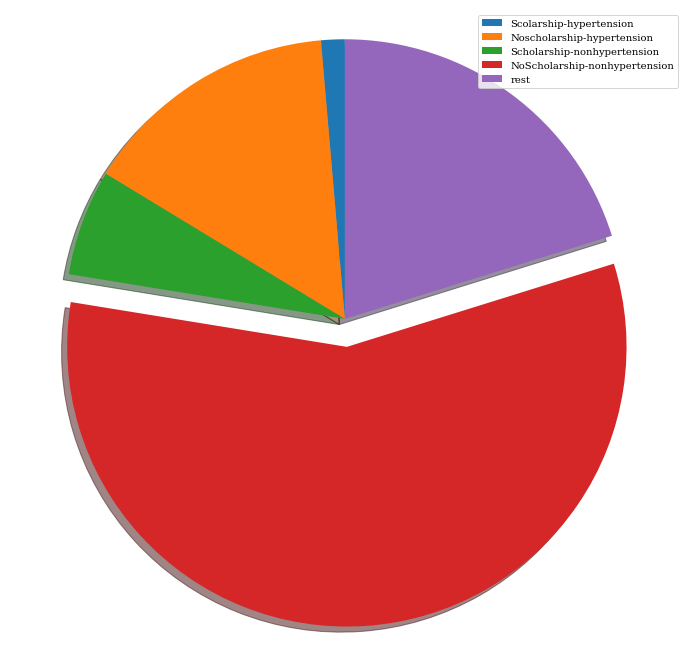

In [240]:
labels = 'Scolarship-hypertension', 'Noscholarship-hypertension', 'Scholarship-nonhypertension', 'NoScholarship-nonhypertension','rest'
sizes = [sch_hyp_show, nosch_hyp_show, sch_nohyp_show, nosch_nohyp_show,rest]
explode = (0, 0, 0, 0.1,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
patches, texts=plt.pie(sizes, explode=explode,shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
texts[0].set_fontsize(4)
plt.axis('equal')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

>We can that people without scholarship and without hypertension show up by 57.3% than the rest of the other categories

>Third Diabetes

In [241]:
df.Scholarship[diabetes].mean()

0.07163540224096689

In [242]:
df.Scholarship[nondiabetes].mean()

0.10032753645792716

>Note that people without diabetes and scholarship have high percentage than people with scholarship and diabetes

>Now we can divied the Diabetes and Nondiabetes with and without scolarship, then compare it to who attend the appointment

>Here we will extract people who have scholarship or not, with diabetes

In [64]:
df_sch_dia = df[(df['Diabetes'] == 1) & (df['Scholarship'] == 1)]
df_nosch_dia = df[(df['Diabetes'] == 1) & (df['Scholarship'] == 0)]
df_sch_dia.shape,df_nosch_dia.shape

((569, 14), (7374, 14))

>Here we will extract people who have scholarship or not, without having diabetes

In [65]:
df_sch_nodia = df[(df['Diabetes'] == 0) & (df['Scholarship'] == 1)]
df_nosch_nodia = df[(df['Diabetes'] == 0) & (df['Scholarship'] == 0)]
df_sch_nodia.shape,df_nosch_nodia.shape

((10292, 14), (92292, 14))

>Lets extract the patients who showed if they have scholarship or not, and they have diabetes

In [68]:
df_sch_dia_show = df_sch_dia[df_sch_dia['Show'] == 1]
df_nosch_dia_show = df_nosch_dia[df_nosch_dia['Show'] == 1]
df_sch_dia_show.shape,df_nosch_dia_show.shape

((446, 14), (6067, 14))

>Lets extract the patients who showed if they have scholarship or not, and they don't have diabetes

In [69]:
df_sch_nodia_show = df_sch_nodia[df_sch_nodia['Show'] == 1]
df_nosch_nodia_show = df_nosch_nodia[df_nosch_nodia['Show'] == 1]
df_sch_nodia_show.shape,df_nosch_nodia_show.shape

((7837, 14), (73858, 14))

>Lets see the precentage and what is the best catagory that showed up to the appointment

In [74]:
sch_dia_show = (446/total)*100
nosch_dia_show =(6067/total)*100
sch_nodia_show =(7837/total)*100
nosch_nodia_show=(73858/total)*100
rest=sch_dia_show+nosch_dia_show+sch_nodia_show+nosch_nodia_show
rest=100-rest

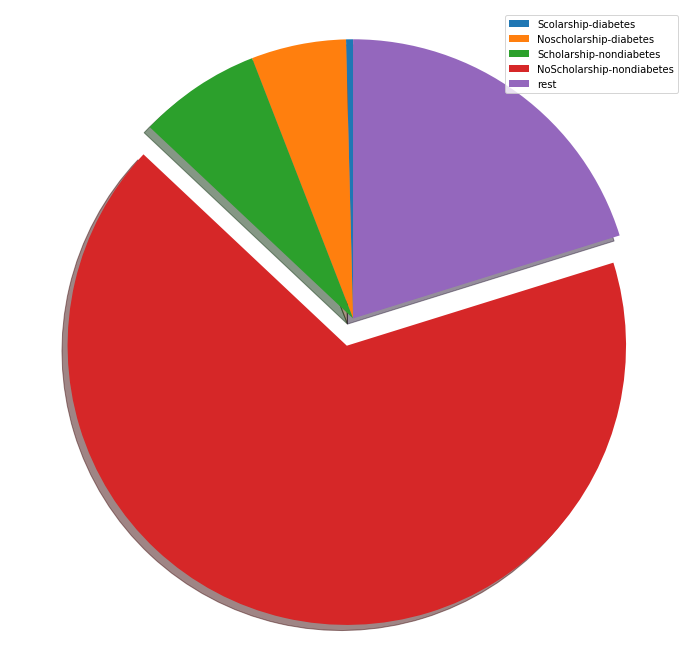

In [75]:
labels = 'Scolarship-diabetes', 'Noscholarship-diabetes', 'Scholarship-nondiabetes', 'NoScholarship-nondiabetes','rest'
sizes = [sch_dia_show, nosch_dia_show, sch_nodia_show, nosch_nodia_show,rest]
explode = (0, 0, 0, 0.1,0) 
fig1, ax1 = plt.subplots()
patches, texts=plt.pie(sizes, explode=explode,shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
texts[0].set_fontsize(4)
plt.axis('equal')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

>We can that people without scholarship and without Diabetes show up by 83.5% than the rest of the other categories

>Last Handicap

In [76]:
df.Scholarship[handicap].mean()

0.07835455435847209

In [77]:
df.Scholarship[nonhandicap].mean()

0.09865541251870048

>Note that people without handicap and with scholarship have high percentage than people with scholarship and with handicap

>Now we can divied the Handicap and Nonhandicap with and without scolarship, then compare it to who attend the appointment

>Here we will extract people who have scholarship or not, with handicap

In [78]:
df_sch_han = df[(df['Handicap'] == 1) & (df['Scholarship'] == 1)]
df_nosch_han = df[(df['Handicap'] == 1) & (df['Scholarship'] == 0)]
df_sch_han.shape,df_nosch_han.shape

((160, 14), (1882, 14))

>Here we will extract people who have scholarship or not, without having handicap

In [79]:
df_sch_nohan = df[(df['Handicap'] == 0) & (df['Scholarship'] == 1)]
df_nosch_nohan = df[(df['Handicap'] == 0) & (df['Scholarship'] == 0)]
df_sch_nohan.shape,df_nosch_nohan.shape

((10683, 14), (97603, 14))

>Lets extract the patients who showed if they have scholarship or not, and they have handicap

In [80]:
df_sch_han_show = df_sch_han[df_sch_han['Show'] == 1]
df_nosch_han_show = df_nosch_han[df_nosch_han['Show'] == 1]
df_sch_han_show.shape,df_nosch_han_show.shape

((133, 14), (1543, 14))

>Lets extract the patients who showed if they have scholarship or not, and they don't handicap

In [81]:
df_sch_nohan_show = df_sch_nohan[df_sch_nohan['Show'] == 1]
df_nosch_nohan_show = df_nosch_nohan[df_nosch_nohan['Show'] == 1]
df_sch_nohan_show.shape,df_nosch_nohan_show.shape

((8133, 14), (78241, 14))

>Lets see the precentage and what is the best catagory that showed up to the appointment

In [82]:
sch_han_show = (133/total)*100
nosch_han_show =(1543/total)*100
sch_nohan_show =(8133/total)*100
nosch_nohan_show=(78241/total)*100
rest=sch_han_show+nosch_han_show+sch_nohan_show+nosch_nohan_show
rest=100-rest

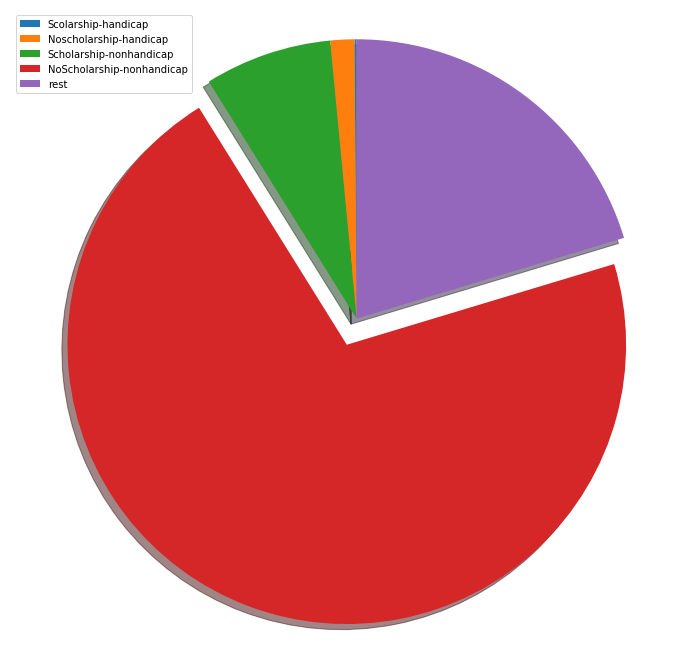

In [63]:
labels = 'Scolarship-handicap', 'Noscholarship-handicap', 'Scholarship-nonhandicap', 'NoScholarship-nonhandicap','rest'
sizes = [sch_han_show, nosch_han_show, sch_nohan_show, nosch_nohan_show,rest]
explode = (0, 0, 0, 0.1,0) 
fig1, ax1 = plt.subplots()
patches, texts=plt.pie(sizes, explode=explode,shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
texts[0].set_fontsize(4)
plt.axis('equal')
plt.tight_layout()
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.show()

>We can that people without scholarship and without Diabetes show up by 83.5% than the rest of the other categories

>The Answer to the question is that people with health problems and scholarship are not showing up to their appointment
>As we can see most of the people without scholarship and health problems always show up to the appointment


### Research Question 2  Does people with multiple appointments attend their appointment?And do patient with high appointments attend most of their appointments?

>First we need to separate the duplicated patients from the original dataset

In [84]:
df_dupl = df.duplicated(subset=['PatientId'])

In [85]:
df_dupli = df[df.duplicated(['PatientId'],keep=False)]

In [86]:
df_dupli.sort_values('PatientId', ascending=False).head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
31366,9999951146446.0,5604848,F,2016-04-20 08:23:15,2016-05-04,38,GURIGICA,1,1,0,0,0,1,0
1641,9999951146446.0,5618129,F,2016-04-26 06:26:06,2016-04-29,38,GURIGICA,1,1,0,0,0,1,0
46976,9999737245272.0,5608572,F,2016-04-20 14:01:55,2016-05-25,8,ANTÔNIO HONÓRIO,1,0,0,0,0,1,1
42450,9999737245272.0,5608436,F,2016-04-20 13:49:30,2016-05-13,8,ANTÔNIO HONÓRIO,1,0,0,0,0,0,0
15983,99994953287696.0,5665855,M,2016-05-05 15:27:34,2016-05-11,6,NOVA PALESTINA,0,0,0,0,0,1,0


>Now by query lets separate the value of patients who showed and didn’t show to the appointment

In [87]:
df_show= df_dupli[df_dupli['Show'] == 1 ]
df_noshow =df_dupli[df_dupli['Show'] == 0]

>let’s get the number of appointments if the patient showed or not. Then get the percentage for both

In [88]:
df_show.shape[0],df_noshow.shape[0]

(57406, 15201)

In [89]:
total_dupli=df_show.shape[0]+df_noshow.shape[0]

In [90]:
show=(df_show.shape[0]/total_dupli)*100
noshow=(df_noshow.shape[0]/total_dupli)*100

In [91]:
show,noshow

(79.06400209346207, 20.93599790653794)

>*Note that* 79% of people who have multiple appointments show up in there next appointment

>Now let's separate the showed patient and not showed then merge the two dataset based on the patented to be able to view the number of attended appointments or not for each patient

In [92]:
df_sum = df_show.groupby(['PatientId'])['Show'].sum()
df_sum = df_sum.reset_index()
111
df_sum.head(5)

,PatientId,Showed
0,111124532532143.0,1
1,1111633122891.0,3
2,111311342971.0,2
3,111346221769879.0,1
4,111415561531417.0,2


In [93]:
df_sum_noshow = df_noshow.groupby(['PatientId'])['Show'].count()
df_sum_noshow = df_sum_noshow.reset_index()
df_sum_noshow.columns = ['PatientId', 'Didnt_show']
df_sum_noshow.head(5)

,PatientId,Didnt_show
0,111124532532143.0,1
1,111346221769879.0,1
2,111415561531417.0,2
3,111557785928.0,1
4,11163631268489.0,2


In [94]:
df_all_show_values=pd.merge(df_sum, df_sum_noshow, left_on='PatientId', right_on='PatientId', how='left')
df_all_show_values.head(5)

,PatientId,Showed,Didnt_show
0,111124532532143.0,1,1.0
1,1111633122891.0,3,NaN
2,111311342971.0,2,NaN
3,111346221769879.0,1,1.0
4,111415561531417.0,2,2.0


>Fill in the NaN values with 0, which means this patient attended all the appointments

In [95]:
df_all_show_values['Didnt_show'].fillna(0,inplace = True)
df_all_show_values['Didnt_show']=df_all_show_values['Didnt_show'].astype(int)
df_all_show_values.head(5)

,PatientId,Showed,Didnt_show
0,111124532532143.0,1,1
1,1111633122891.0,3,0
2,111311342971.0,2,0
3,111346221769879.0,1,1
4,111415561531417.0,2,2


>Now we can get the percent of if patient have multiple appointments, is the patient going to attend all the appointments?

In [96]:
df_showed_toall=df_all_show_values[df_all_show_values['Didnt_show']==0]
percent_show_toall=(df_showed_toall.shape[0]/df_all_show_values.shape[0])*100
percent_show_toall 

59.2411784857828

In [97]:
df_noshow_toall=df_all_show_values[df_all_show_values['Didnt_show'] != 0]
percent_noshow_toall=(df_noshow_toall.shape[0]/df_all_show_values.shape[0])*100
percent_noshow_toall

40.758821514217196

>We can see that people who have multiple appointments have the chance of 59% to show in their next appointment

>Now lets see the patients who didnt show to all of their appointments and who showed to their appointments

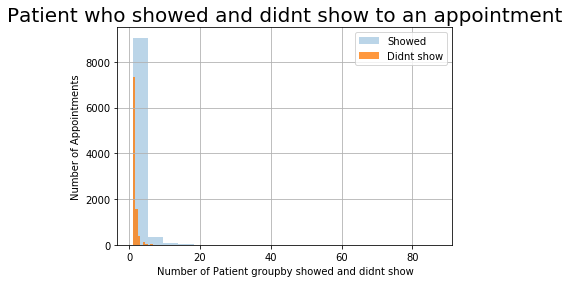

In [103]:
ax=df_noshow_toall['Showed'].hist(alpha=0.3,bins=20,label='Showed')
ax=df_noshow_toall['Didnt_show'].hist(alpha=0.8,bins=20,label='Didnt show')
ax.set_ylabel("Number of Appointments", fontsize=10)
ax.set_xlabel("Number of Patient groupby showed and didnt show", fontsize=10)
ax.set_title("Patient who showed and didnt show to an appointment", fontsize=20)
plt.legend();

>We can see by the visualization that majority of patient attended most of their appointment

>Let’s divide the patient who didn’t show into some of their appointments into sub datasets, then visualize the datasets to understand the relation between the appointments attended and the appointments that aren’t attended by the patient.
>*Note that* the interval starts from 2-5 and it goes by 5 until we reach value of 16 then it will contain all the rest values

In [104]:
df_noshow_2_5 = df_noshow_toall[(df_noshow_toall['Showed'] >= 2) & (df_noshow_toall['Showed'] <= 5) ]

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 <a list of 9 Text yticklabel objects>)

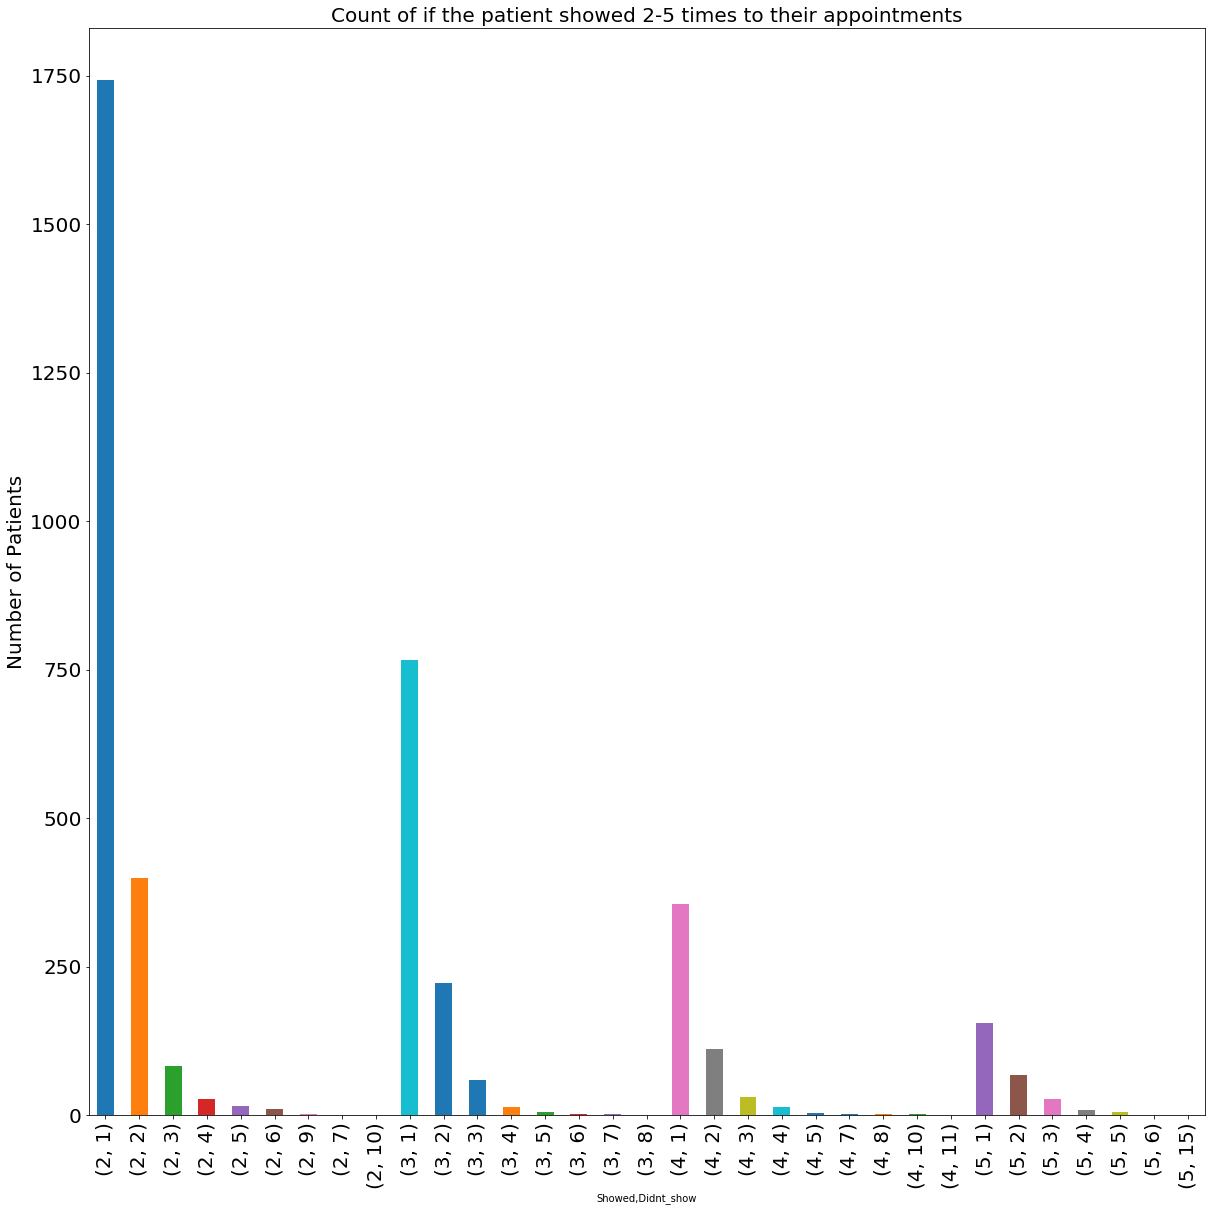

In [105]:
ax=df_noshow_2_5.groupby(['Showed'])['Didnt_show'].value_counts().plot(kind='bar',figsize=(20,20))
ax.set_ylabel("Number of Patients", fontsize=20)
ax.set_title("Count of if the patient showed 2-5 times to their appointments", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [106]:
df_noshow_6_10 = df_noshow_toall[(df_noshow_toall['Showed'] >= 6) & (df_noshow_toall['Showed'] <= 10) ]


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text yticklabel objects>)

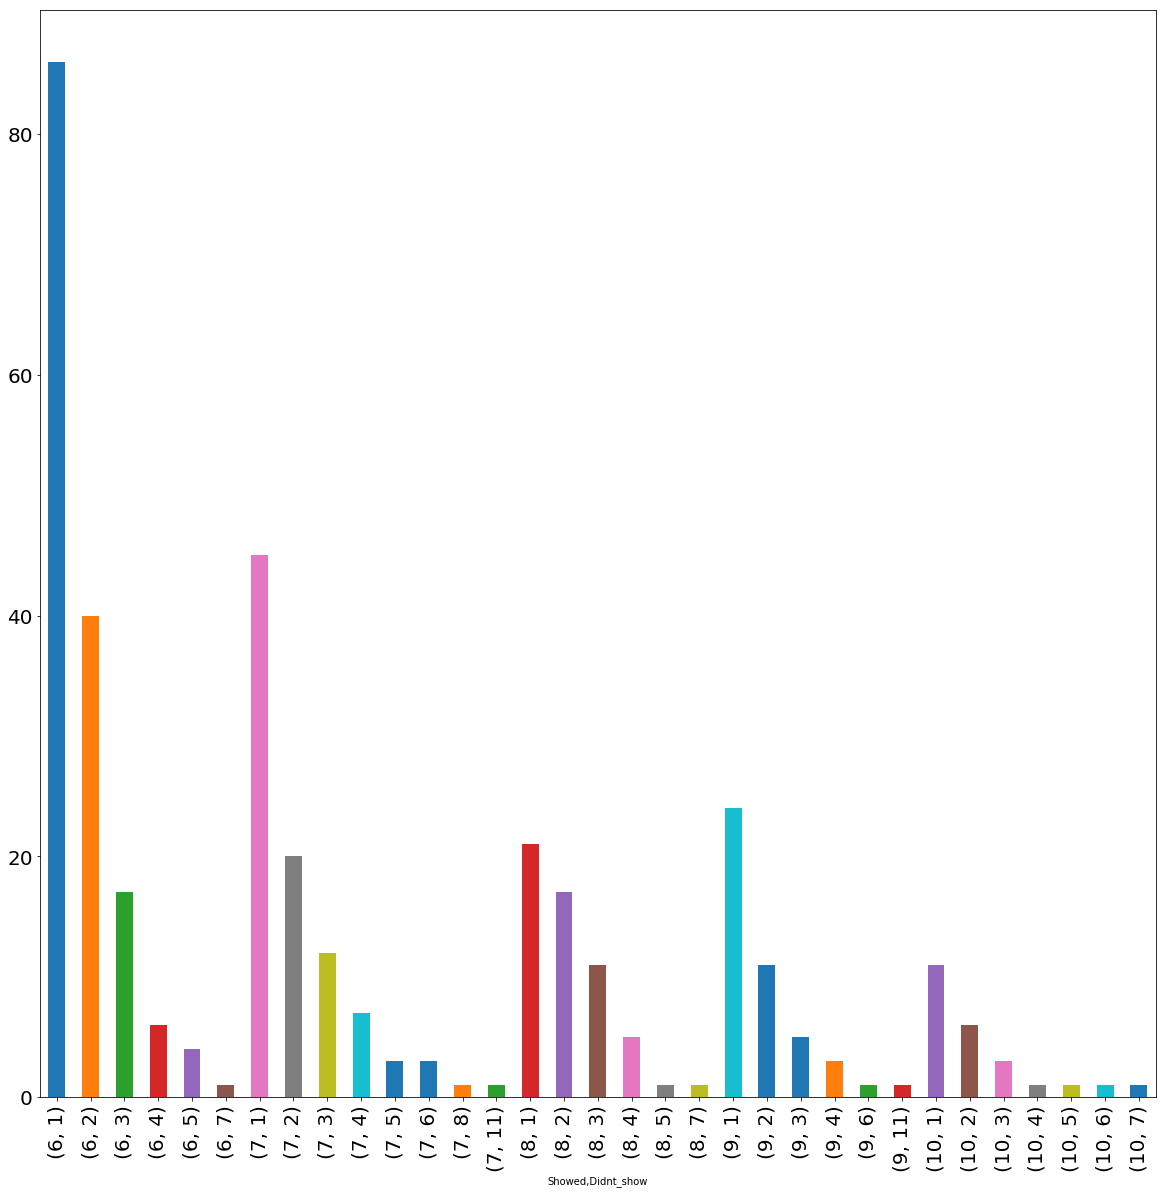

In [107]:
df_noshow_6_10.groupby(['Showed'])['Didnt_show'].value_counts().plot(kind='bar',figsize=(20,20))
ax.set_ylabel("Number of Patients", fontsize=20)
ax.set_title("Count of if the patient showed 6-10 times to their appointments", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [108]:
df_noshow_11_15 = df_noshow_toall[(df_noshow_toall['Showed'] >= 11) & (df_noshow_toall['Showed'] <= 15) ]

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text yticklabel objects>)

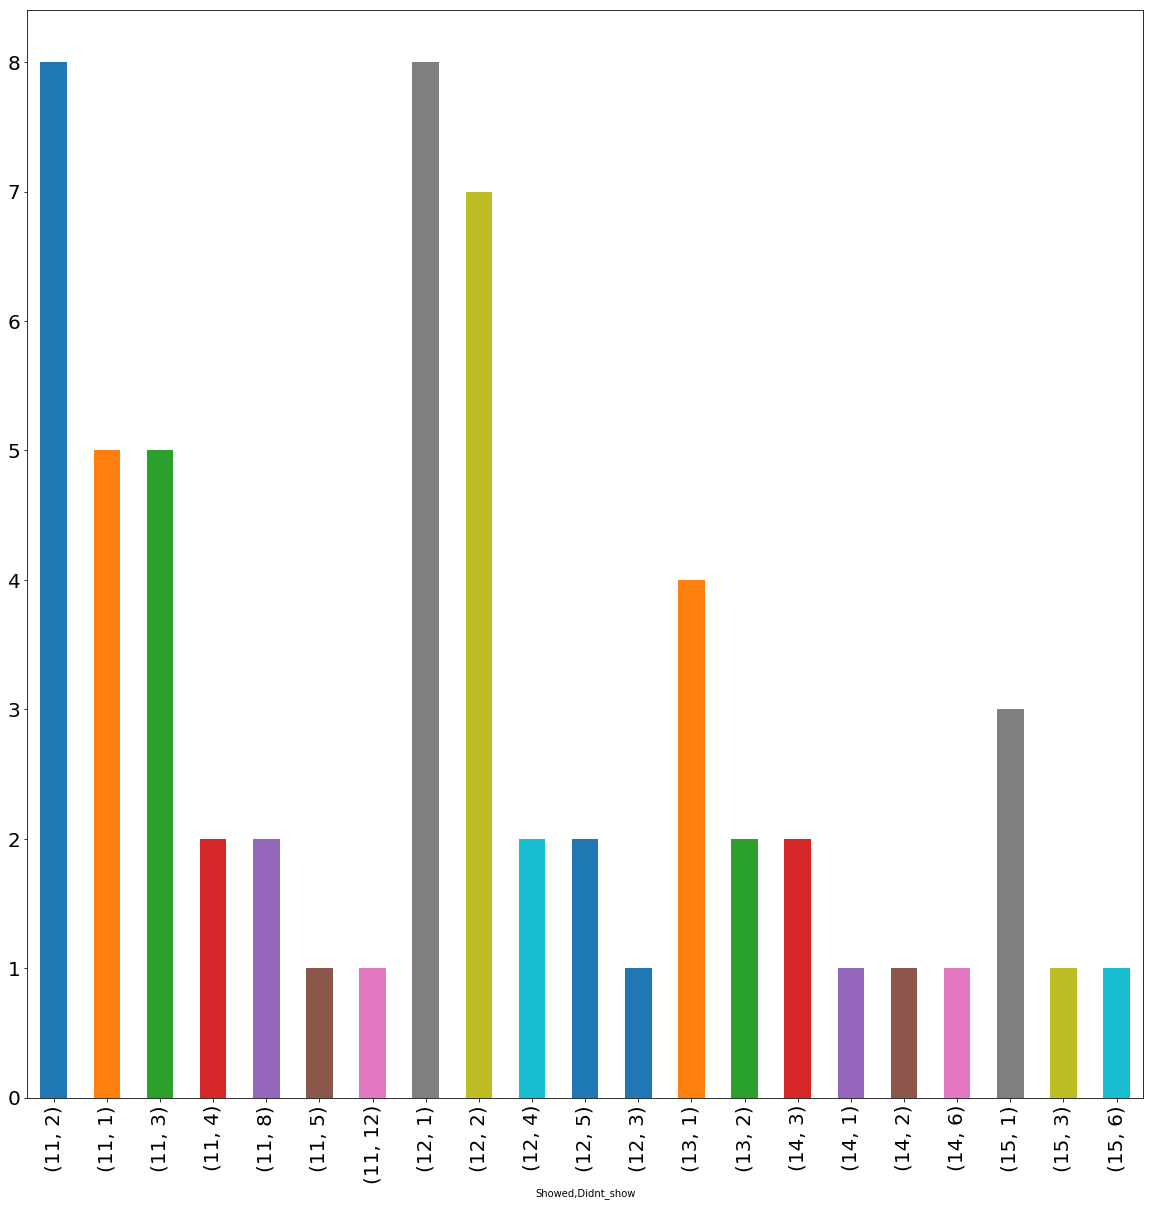

In [109]:
df_noshow_11_15.groupby(['Showed'])['Didnt_show'].value_counts().plot(kind='bar',figsize=(20,20))
ax.set_ylabel("Number of Patients", fontsize=20)
ax.set_title("Count of if the patient showed 11-15 times to their appointments", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [110]:
df_noshow_16_87 = df_noshow_toall[(df_noshow_toall['Showed'] >= 16)]

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text yticklabel objects>)

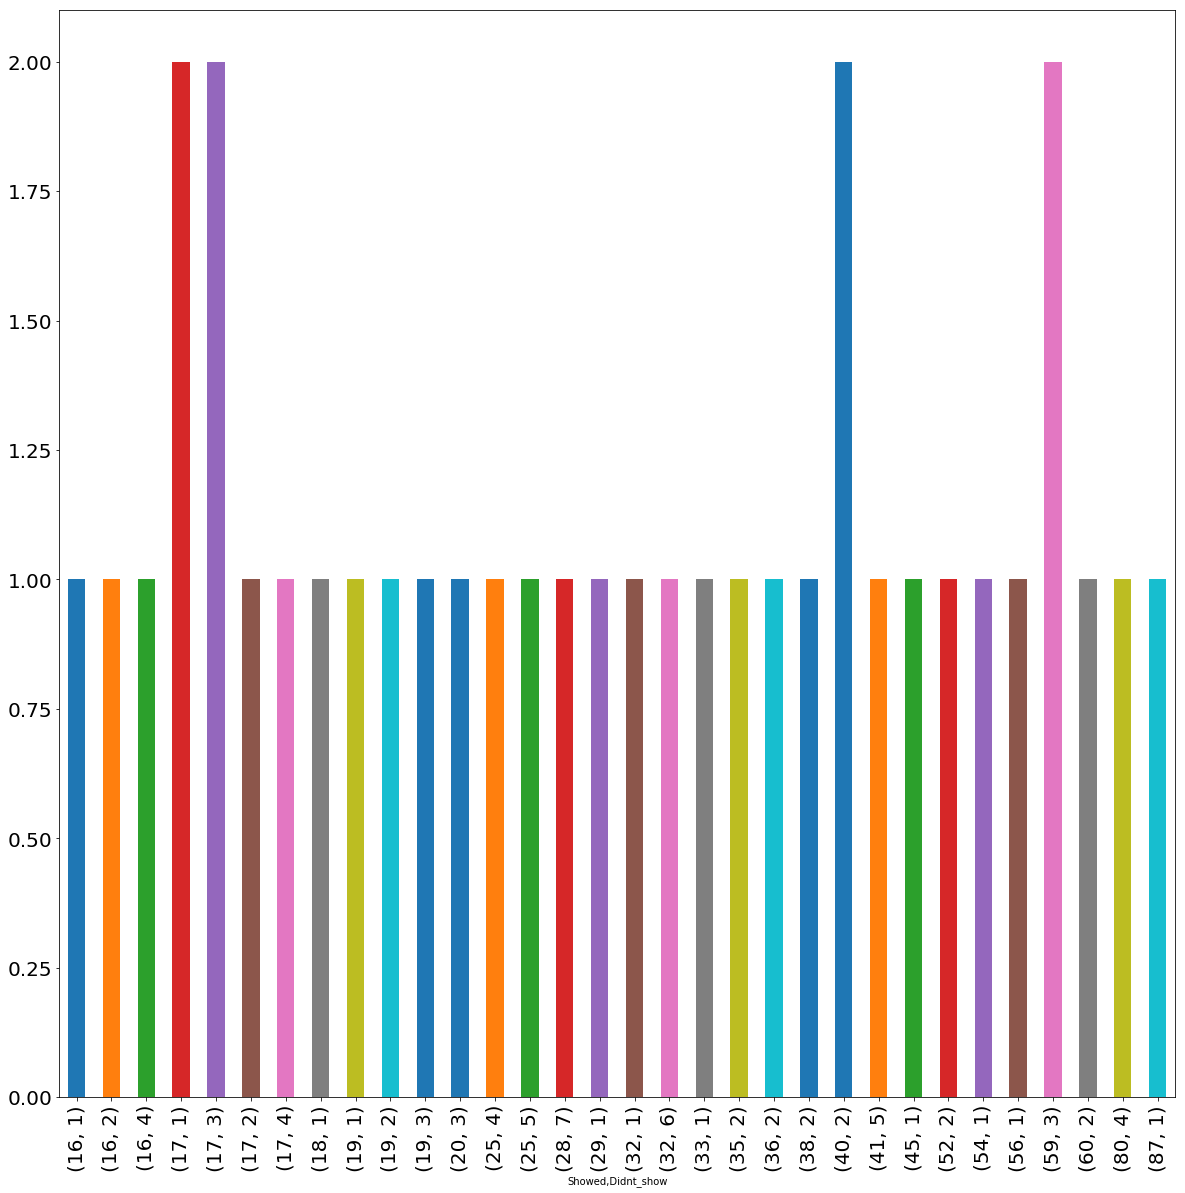

In [111]:
df_noshow_16_87.groupby(['Showed'])['Didnt_show'].value_counts().plot(kind='bar',figsize=(20,20))
ax.set_ylabel("Number of Patients", fontsize=20)
ax.set_title("Count of if the patient showed 16-87 times to their appointments", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

>Conclusion of visualization is that as much attended appointments that the patient have the lower the values of the patient not showing up to the other appointments

>To answer the questions, we have. Yes, people with multiple appointments tend to attend all the appointments by 59% chance. Also, if the patient has high number of appointments attended the lower the chance of not attending their appointments

<a id='conclusions'></a>
## Conclusions

>Finally, the data set was filled with information about the patient condition regarding specific categories such as alcoholism. In the other hand there was incorrect spelling mistakes, which is possible considering that the data comes from another language. Having more categories will make us understand the patients pattern better and how we can predict their behavior or showing and not showing up regularly to their appointment. 
> As a conclusion, we can say if there is scholarship and health condition patient have lower chance of showing up to the appointment.
>Also, if the patient has multiple appointments the chance of showing up to their appointment is 59%. As the patient have more appointment the showing up pattern is regular and stable comparing to 2-5 appointments records.
